In [1]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

O risco sistemático afeta todo o mercado e impacta o índice Sharpe. Qualquer estratégia de negociação deve considerar o impacto do risco sistemático. Embora uma estratégia deva envolver algum risco para gerar lucro, o risco sistemático não pode ser diversificado.

Ao proteger contra o risco sistemático, podemos proteger melhor nossas estratégias e, em última análise, superar o mercado.

[*********************100%%**********************]  6 of 6 completed


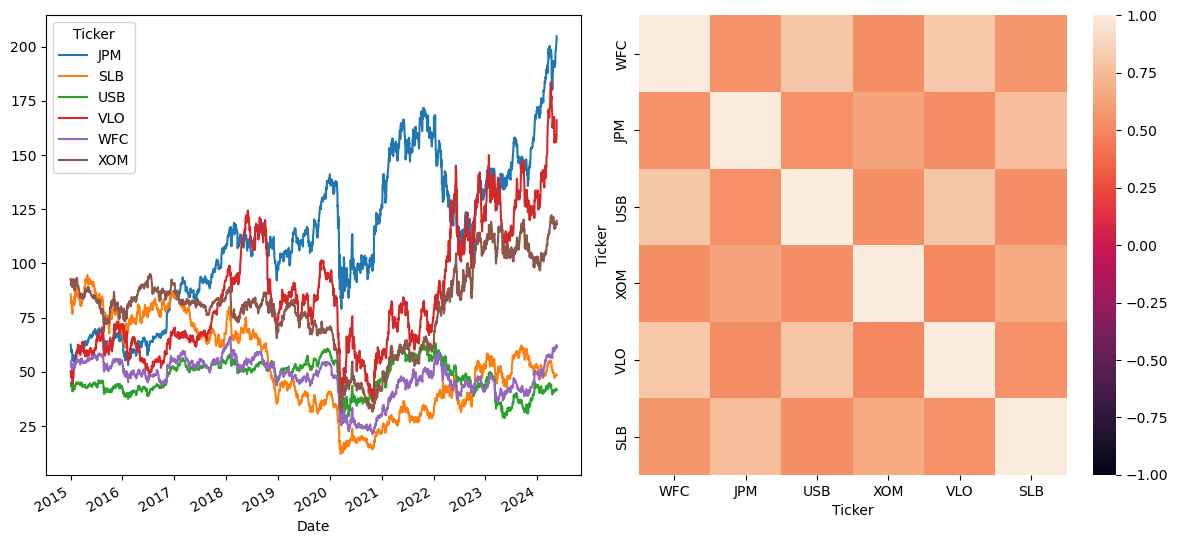

In [7]:
tickers = ["WFC", "JPM", "USB", "XOM", "VLO", "SLB"]
data = yf.download(tickers, start="2015-01-01", end="2024-05-20")["Close"]
returns = data.pct_change().dropna()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,6))
fig.tight_layout()
corr = returns.corr()
left = data.plot(ax=ax1)
right = sns.heatmap(
    corr, ax=ax2, vmin=-1, vmax=1,
    xticklabels=tickers, yticklabels=tickers
)


O resultado acima são dois gráficos. O primeiro mostra o preço histórico das ações. A segunda mostra a matriz de correlação.

In [8]:
market_symbols = ["XLF", "SPY", "XLE"]
sector_1_stocks = ["WFC", "JPM", "USB"]
sector_2_stocks = ["XOM", "VLO", "SLB"]
tickers = market_symbols + sector_1_stocks + sector_2_stocks
price = yf.download(tickers, start="2015-01-01", end="2023-12-31").Close
returns = price.pct_change().dropna()

[*********************100%%**********************]  9 of 9 completed


In [9]:
market_returns = returns["SPY"]
sector_1_returns = returns["XLF"]
sector_2_returns = returns["XLE"]
stock_returns = returns.drop(market_symbols, axis=1)
residuals_market = stock_returns.copy() * 0.0
residuals = stock_returns.copy() * 0.0

In [10]:
def ols_residual(y, x):
    results = sm.OLS(y, x).fit()
    return results.resid
sector_1_excess = ols_residual(sector_1_returns, market_returns)
sector_2_excess = ols_residual(sector_2_returns, market_returns)
for stock in sector_1_stocks:
    residuals_market[stock] = ols_residual(returns[stock], market_returns)
    residuals[stock] = ols_residual(residuals_market[stock], sector_1_excess)
for stock in sector_2_stocks:
    residuals_market[stock] = ols_residual(returns[stock], market_returns)
    residuals[stock] = ols_residual(residuals_market[stock], sector_2_excess)

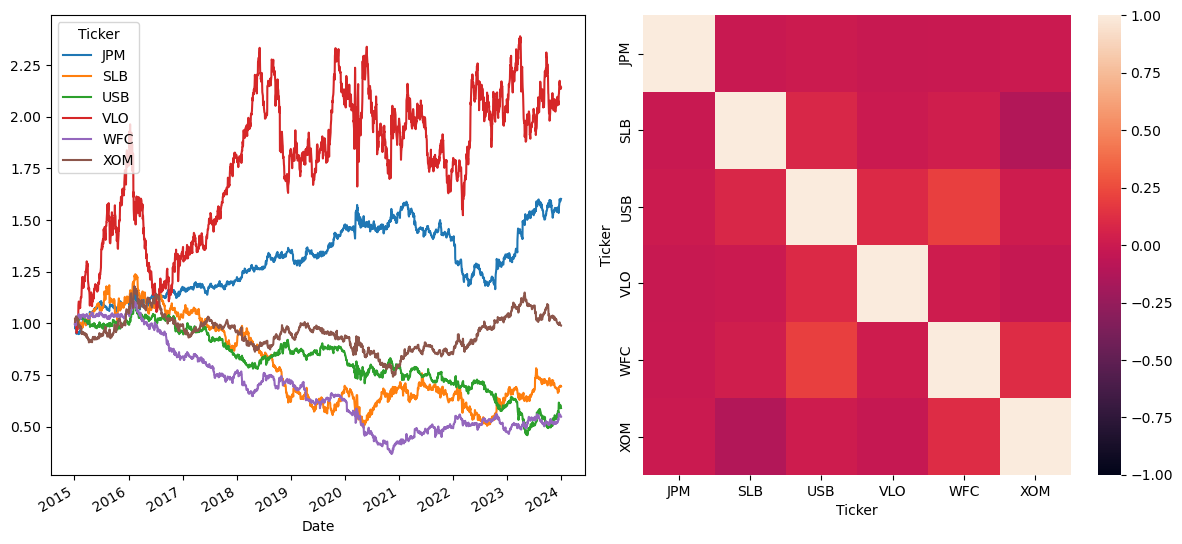

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize =(12,6))
fig.tight_layout()
corr = residuals.corr()
left = (1 + residuals).cumprod().plot(ax=ax1)
right = sns.heatmap(
    corr,
    ax=ax2,
    fmt="d",
    vmin=-1,
    vmax=1,
    xticklabels=residuals.columns,
    yticklabels=residuals.columns,
)